Q1A, 2A, 3A

1A

In [825]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [826]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [827]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [828]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dfTrainA = dfTrain[list2]
dfTestA = dfTest[list2]
dfTrainA.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [829]:
dfTrainA.shape


(436, 6)

In [830]:
xTrain = dfTrainA.values[:,1:6]
xTest = dfTestA.values[:,1:6]

yTrain = dfTrainA.values[:,0]
yTest = dfTestA.values[:,0]
xTrain.shape


(436, 5)

In [831]:
xTest.shape


(109, 5)

In [832]:
#1 col of ones
x11 = np.ones((436, 1)) 
x12 = np.ones((109, 1))

In [833]:
# 1d to 2d
x21 = xTrain.reshape(436, 5) 
x22 = xTest.reshape(109, 5)

In [834]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape


(436, 6)

In [835]:
iterations = 1000; 
alpha = 0.000000001;

theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [836]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [837]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [838]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew, xTestNew, yTrain, yTest, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

# print('costHistoryTest array =')
# costHistoryTest

Final value of theta = [4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]
costHistoryTrain = 1363688825124.9084 costHistoryTest=  310132134530.36285


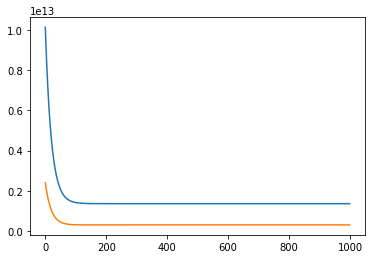

In [839]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")

In [840]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]


2A Normalizer

In [841]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [842]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [843]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dfTrainB = dfTrain[list2]
dfTestB = dfTest[list2]
dfTrainB.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [844]:
#from matplotlib.colors import Normalize

import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

#scaler = StandardScaler()  #uncomment when testing standardization
scaler = Normalizer()       #uncomment when testing normalization
#scaler = MinMaxScaler()     #uncomment when testing Minmaxscaler

# dfTrainB[list2] = scaler(dfTrainB[list2]) #for normalize
# dfTestB[list2] = scaler(dfTestB[list2])

dfTrainB[list2] = scaler.fit_transform(dfTrainB[list2])
dfTestB[list2] = scaler.fit_transform(dfTestB[list2])
dfTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [845]:
xTrain2 = dfTrainB.values[:,1:6]
xTest2 = dfTestB.values[:,1:6]

yTrain2 = dfTrainB.values[:,0]
yTest2 = dfTestB.values[:,0]
xTrain2.shape

(436, 5)

In [846]:
#matrix - 1col of ones 
x31 = np.ones((436, 1)) 
x32 = np.ones((109, 1))

In [847]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5) 
x42 = xTest2.reshape(109, 5)

In [848]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [849]:
iterations = 1000; 
alpha = 0.01;

theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [850]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [851]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [852]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.45736036e-07]
costHistoryTrain = 4.220853601404382e-08 costHistoryTest=  1.0557385942524042e-08


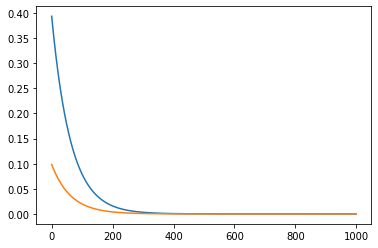

In [853]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")

In [854]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.45736036e-07]


2A Standardizer

In [855]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [856]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [857]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dfTrainB = dfTrain[list2]
dfTestB = dfTest[list2]
dfTrainB.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [858]:
#from matplotlib.colors import Normalize

import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()   #uncomment when testing standardization
#scaler = Normalizer()       #uncomment when testing normalization
#scaler = MinMaxScaler()      #uncomment when testing Minmax 

# dfTrainB[list2] = scaler(dfTrainB[list2]) #for normalize
# dfTestB[list2] = scaler(dfTestB[list2])

dfTrainB[list2] = scaler.fit_transform(dfTrainB[list2])
dfTestB[list2] = scaler.fit_transform(dfTestB[list2])
dfTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,-0.819149
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-0.819149
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.325559
175,0.247444,2.175399,1.399408,1.475561,0.212914,1.470267
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,-0.819149
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,-0.819149


In [859]:
xTrain2 = dfTrainB.values[:,1:6]
xTest2 = dfTestB.values[:,1:6]

yTrain2 = dfTrainB.values[:,0]
yTest2 = dfTestB.values[:,0]
xTrain2.shape

(436, 5)

In [860]:
#matrix - 1col of ones 
x31 = np.ones((436, 1)) 
x32 = np.ones((109, 1))

In [861]:
# 1d to 2d
x41 = xTrain2.reshape(436, 5) 
x42 = xTest2.reshape(109, 5)

In [862]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [863]:
iterations = 1000; 
alpha = 0.01;

theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [864]:
def compute_cost(X, Y, theta): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 

    return J

In [865]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta; 
        costHistoryTrain[i] = compute_cost(X1, Y1, theta)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [866]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]
costHistoryTrain = 0.17847785867645652 costHistoryTest=  0.03892348541035558


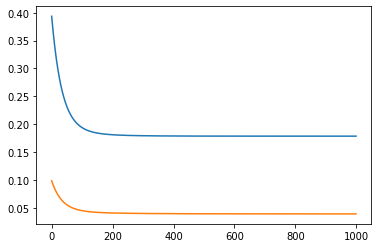

In [867]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")

In [868]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]


3A Normalizer

In [869]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [870]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [871]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dfTrainC = dfTrain[list2]
dfTestC = dfTest[list2]
dfTrainC.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [872]:

import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

# scaler = StandardScaler()
scaler = Normalizer()
#scaler = MinMaxScaler()



dfTrainC[list2] = scaler.fit_transform(dfTrainC[list2])
dfTestC[list2] = scaler.fit_transform(dfTestC[list2])
dfTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [873]:
xTrain3 = dfTrainC.values[:,1:6]
xTest3 = dfTestC.values[:,1:6]

yTrain3 = dfTrainC.values[:,0]
yTest3 = dfTestC.values[:,0]
xTrain3.shape

(436, 5)

In [874]:
#matrix - 1col of ones 
x11 = np.ones((436, 1)) 
x12 = np.ones((109, 1))

In [875]:
# 1d to 2d
x21 = xTrain3.reshape(436, 5) 
x22 = xTest3.reshape(109, 5)

In [876]:
xTrainNew3 = np.hstack((x11, x21))
xTestNew3 = np.hstack((x12, x22))
xTrainNew3.shape

(436, 6)

In [877]:
iterations = 5000; 
alpha = 0.01;
lamda : 3

theta = [0., 0., 0., 0., 0., 0.]
theta


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [878]:
def compute_cost_reg(X, Y, theta, lamda): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    sqrErrors = np.sum(sqrErrors)
    reg_term = lamda * np.sum(np.square(theta))
    J = 1 / (2 * m) * np.sum(sqrErrors + reg_term) 

    return J

In [879]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 
    lamda = 3

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta;
        costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [880]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNew3, xTestNew3, yTrain3, yTest3, theta, alpha, iterations, lamda=3 ) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [9.99997929e-01 1.14671381e-03 6.88763660e-07 2.90347839e-07
 4.07390131e-07 1.45782460e-07]
costHistoryTrain = 0.002752285795607559 costHistoryTest=  1.0465450984661629e-13


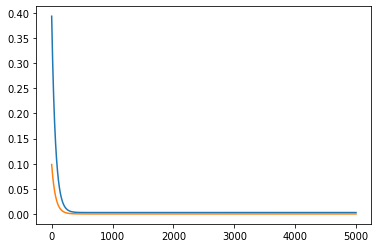

In [881]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")

In [882]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99997929e-01 1.14671381e-03 6.88763660e-07 2.90347839e-07
 4.07390131e-07 1.45782460e-07]


3A Standardizer

In [883]:
df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/Housing.csv'))
df.head()
m = len(df)

In [884]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dfTrain, dfTest =train_test_split(df, train_size = 0.8, test_size = 0.2)
dfTrain.shape

(436, 13)

In [885]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dfTrainC = dfTrain[list2]
dfTestC = dfTest[list2]
dfTrainC.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [886]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = StandardScaler()
#scaler = Normalizer()
#scaler = MinMaxScaler()

dfTrainC[list2] = scaler.fit_transform(dfTrainC[list2]) #for standardize
dfTestC[list2] = scaler.fit_transform(dfTestC[list2])
dfTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,-0.819149
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-0.819149
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.325559
175,0.247444,2.175399,1.399408,1.475561,0.212914,1.470267
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,-0.819149
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,-0.819149


In [887]:
xTrain3 = dfTrainC.values[:,1:6]
xTest3 = dfTestC.values[:,1:6]

yTrain3 = dfTrainC.values[:,0]
yTest3 = dfTestC.values[:,0]
xTrain3.shape

(436, 5)

In [888]:
#matrix - 1col of ones 
x11 = np.ones((436, 1)) 
x12 = np.ones((109, 1))

In [889]:
# 1d to 2d
x21 = xTrain3.reshape(436, 5) 
x22 = xTest3.reshape(109, 5)

In [890]:
xTrainNew3 = np.hstack((x11, x21))
xTestNew3 = np.hstack((x12, x22))
xTrainNew3.shape

(436, 6)

In [891]:
iterations = 5000; 
alpha = 0.01;
# lamda : 0.5

theta = [0., 0., 0., 0., 0., 0.]
theta


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [892]:
def compute_cost_reg(X, Y, theta, lamda): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    sqrErrors = np.sum(sqrErrors)
    reg_term = lamda * np.sum(np.square(theta))
    J = 1 / (2 * m) * np.sum(sqrErrors + reg_term)
    return J

In [893]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
    costHistoryTrain = np.zeros(iterations) 
    costHistoryTest = np.zeros(iterations) 

    for i in range(iterations): 
        predictions = X1.dot(theta) 
        errors = np.subtract(predictions, Y1) 
        sum_delta = (alpha / m) * X1.transpose().dot(errors); 
        theta = theta - sum_delta;
        costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)   
        costHistoryTest[i] = compute_cost(X2, Y2, theta)
    return theta, costHistoryTrain, costHistoryTest

In [894]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNew3, xTestNew3, yTrain3, yTest3, theta, alpha, iterations, lamda=5) 
print('Final value of theta =', theta) 
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [2.69101764e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
costHistoryTrain = 0.1800128798827366 costHistoryTest=  0.03889723142980106


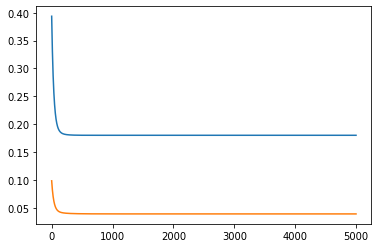

In [895]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")

In [896]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.69101764e-16 3.88481823e-01 8.90638389e-02 3.04158794e-01
 2.40439813e-01 1.60108157e-01]
